***
# *What types of films are currently doing the best at the box office and what are some actionable insights from that data that can be used when starting a new movie studio?*
***

# imports and initialization

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cpi


In [2]:
cpi.update()

In [2]:
ls ./datasets

bom.movie_gross.csv*       imdb.title.ratings.csv*
imdb.name.basics.csv*      rt.movie_info.tsv*
imdb.title.akas.csv*       rt.reviews.tsv*
imdb.title.basics.csv*     tmdb.movies.csv*
imdb.title.crew.csv*       tn.movie_budgets.csv*
imdb.title.principals.csv*


# bom.movie_gross.csv

## Summary

Table with movie titles, a studio abbreviation, domestic gross, foreign gross and year.

There are 3387 movies, but 40% of them are missing their foreign_gross, plus a minor amount don't have a domestic gross.  At least some of the movies with no listed domestic gross did not have a domestic release.

## Columns:  
* title
* studio
* domestic_gross
* foreign_gross
* year

## EDA

In [8]:
bom_df = pd.read_csv('datasets/bom.movie_gross.csv')

In [9]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
# remove the commas from the data in the foreign_gross column and convert it to float
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')

bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float')

In [12]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


why are there NAN in the foreign gross column?

is it because there is no foreign gross or because there is no data?

there are also some rows with no domestic gross, why?

In [13]:
bom_df.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [70]:
# first lets look at the data with no foreign_gross
bom_df[bom_df['foreign_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


doing a google search on Flipped, I found that there is an international box office amount of $2,534,781 which is greater than the domestic_gross

listed at https://www.the-numbers.com/movie/Flipped#tab=summary

so foreign_gross info is available just not in this dataset

is it worth trying to scrape it? 1350 is 40 percent of the dataset, so it might be worth the effort

the data at www.the-numbers.com is not easily scraped and is in fact prohibited, but they do offer an academic use dataset.  Maybe it could be useful.

In [73]:
# next lets look at the movies with no domestic_gross and sort them
for_sorted_bom_df = bom_df[bom_df['domestic_gross'].isna()].sort_values(by=['foreign_gross'], ascending=False)

In [74]:
for_sorted_bom_df

,title,studio,domestic_gross,foreign_gross,year
2825,Secret Superstar,NaN,NaN,122000000.0,2017
2392,Finding Mr. Right 2,CL,NaN,114700000.0,2016
1975,Surprise - Journey To The West,AR,NaN,49600000.0,2015
2468,Solace,LGP,NaN,22400000.0,2016
1268,22 Bullets,Cdgm.,NaN,21300000.0,2013
871,Solomon Kane,RTWC,NaN,19600000.0,2012
1659,Jessabelle,LGF,NaN,7000000.0,2014
1308,Matru Ki Bijlee Ka Mandola,FIP,NaN,6000000.0,2013
928,The Tall Man,Imag.,NaN,5200000.0,2012
537,Force,FoxS,NaN,4800000.0,2011


the highest grossing movie on this list, Secret Superstar, did not have a domestic_gross

and neither did the 2nd, Finding Mr. Right 2.

# imdb.name.basics.csv

## Summary

Table with names of people working in the movie industry, their primary professions and the titles they are known for.  It includes an id for that person, and movie id's that can that can be referenced in other IMDB tables.

## Columns
* nconst
* primary_name
* birth_year
* death_year
* primary_profession
* known_for_titles

## EDA

### primary_profession and known_for_titles both contain lists.
* primary_profession contains a list of strings of job titles
* know_for_titles contains a list of presumably foreign keys

### todo: split the primary_profession column in some way tbd

In [4]:
imdb_name_basics_df = pd.read_csv('datasets/imdb.name.basics.csv')

In [14]:
imdb_name_basics_df.head(10)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous","tt0404826,tt0111756,tt0367027,tt1492842"


In [6]:
imdb_name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [24]:
# look into the rows with actors
# first need to filter out the rows with NaN for primary_profession
no_pp_nan_imdb_name_basics_df = imdb_name_basics_df[imdb_name_basics_df['primary_profession'].notna()] 

In [27]:
# then filter looking for rows that contain a primary_profession of actor
no_pp_nan_imdb_name_basics_df[no_pp_nan_imdb_name_basics_df['primary_profession'].str.contains('actor')]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
14,nm0066093,Ahmad Bedair,1945.0,NaN,"actor,miscellaneous","tt2290391,tt0424830,tt0297398,tt2338117"
15,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director","tt1355327,tt1977735,tt0173525,tt1710520"
17,nm0066897,Mohammad-Ali Behboudi,1956.0,NaN,actor,"tt6836462,tt4591834,tt0375911,tt2101473"
...,...,...,...,...,...,...
606633,nm9985838,Anthony Simonetti,NaN,NaN,actor,tt8028908
606637,nm9989005,Jae-Hwan Kim,NaN,NaN,actor,NaN
606639,nm9989840,Mariya Shekaturova,NaN,NaN,actor,tt5953804
606641,nm9990047,Joseph Jackson,NaN,NaN,actor,NaN


In [28]:
# birth_year and death_year are not relevent because there are so many missing values

# imdb.title.akas.csv

## Summary

A table of the multiple names a movie may have around the world that all refer to a single id.

## Columns

* title_id 
  * is a shared key for the imdb tables
* ordering
  * an index relative to each title
* region
  * a country code
* language 
  * may be the dubbed language of the film or maybe subtitles
* attributes
  * extra notes, most don't have them
* is_original_title 
  * is either 0 or 1 (some entries that are the same as the original title are 0 for some reason)

## EDA

In [30]:
imdb_title_akas_df = pd.read_csv('datasets/imdb.title.akas.csv')

In [35]:
imdb_title_akas_df.head(20)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


In [32]:
imdb_title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [33]:
imdb_title_akas_df.describe()

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


In [37]:
imdb_title_akas_df[imdb_title_akas_df['title_id'] == 'tt0369610']

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


# imdb.title.basics.csv

## Summary

A table with movie id, two titles, release year, length and **genres**.

## columns
* tconst
  * the title key for the imdb tables
* primary_title 
  * ( there are 14,504 rows where the primary_title != the original_title)
* original_title
* start_year 
  * (presumably the release year)
* runtime_minutes
  * 31,739 NaN values
* genres
  * a list of genres ordered alphabetically, not by weight

## EDA

In [38]:
imdb_title_basics_df = pd.read_csv('datasets/imdb.title.basics.csv')

In [39]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [40]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [41]:
imdb_title_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [43]:
imdb_title_basics_df[imdb_title_basics_df['runtime_minutes'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [44]:
imdb_title_basics_df[imdb_title_basics_df['primary_title'] != imdb_title_basics_df['original_title']]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
...,...,...,...,...,...,...
146026,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,2019,116.0,"Comedy,Drama"
146028,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,2019,NaN,"Adventure,Crime,Drama"
146037,tt9900688,Big Three Dragons,Da San Yuan,2019,111.0,Comedy
146121,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary


# imdb.title.crew.csv

## Summary

A table with all the directors and writers for movies.

## Columns
* tconst
* directors
  * can be single entry, list, or NaN
* writers
  * can be single entry, list, or NaN

## EDA

In [46]:
imdb_title_crew_df = pd.read_csv('datasets/imdb.title.crew.csv')

In [47]:
imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [48]:
imdb_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


# imdb.title.principals.csv

## Summary

A table of the principals on a film with the actors given their character names.  Everyone's actual names must be retrieved from imdb_name_basics_df and the film they are working on must be retrieved from imdb_title_basics_df.

## Columns
* tconst
* ordering
* nconst
* category
* job
  * mostly NaN
  * appear to be additional info for category, although there are plenty where both category and job are producer
* characters

## EDA

In [49]:
imdb_title_principals_df = pd.read_csv('datasets/imdb.title.principals.csv')

In [50]:
imdb_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [51]:
imdb_title_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [57]:
imdb_title_principals_df[imdb_title_principals_df['job'].notna()]['category'].value_counts()

producer               113724
writer                  45494
director                 7504
cinematographer          7392
composer                 2003
editor                   1452
production_designer       115
Name: category, dtype: int64

In [126]:
imdb_title_principals_df['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

# imdb.title.ratings.csv

## Summary

An average rating and number of ratings for each movie.

## Columns
* tconst
* averagerating
* numvotes

## EDA

In [60]:
imdb_title_ratings_df = pd.read_csv('datasets/imdb.title.ratings.csv')

In [61]:
imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [62]:
imdb_title_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [67]:
# what is the movie with the maximum votes (a major outlier)
imdb_title_ratings_df.iloc[imdb_title_ratings_df['numvotes'].idxmax()]

tconst           tt1375666
averagerating          8.8
numvotes           1841066
Name: 63498, dtype: object

In [68]:
# look up tconst in imdb_title_basics_df
imdb_title_basics_df[imdb_title_basics_df['tconst'] == 'tt1375666']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"


# rt.movie_info.tsv

## Summary

Table with a lot of movie info, but no movie names and no other table to refer to.  

Independent of actual movies, the release date, box office income and rating are important information.

## Columns
* id
* synopsis
* rating
* genre
* director
* writer
* theater_date
* dvd_date
* currency
  * the currency for the value in box_office
  * 340 are \\$ and the rest are Nan, presumably they are all in \\$
* box_office
* runtime
  * a string at least containing the word minutes
* studio

## EDA

In [70]:
rt_movie_info_df = pd.read_csv('datasets/rt.movie_info.tsv', sep='\t')

In [71]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [72]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [75]:
rt_movie_info_df['currency'].value_counts(dropna=False)

NaN    1220
$       340
Name: currency, dtype: int64

# rt.reviews.tsv

## Summary

A table with movie reviews, but no way to attribute them to a particular movie.

## Columns
* id
  * foreign_key identifying the movie in rt_movie_info_df
* review
* rating
  * may by NaN
* fresh
  * boolean type value either fresh(good) or rotten(bad)
* critic
* top_critic
  * boolean type value of 0 and 1, with 1 being a top critic
* publisher
* date

## EDA

In [79]:
rt_reviews_df = pd.read_csv('datasets/rt.reviews.tsv', sep='\t', encoding ='latin1')

In [80]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [81]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [82]:
rt_reviews_df['fresh'].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [85]:
rt_reviews_df['top_critic'].value_counts(dropna=False)

0    41336
1    13096
Name: top_critic, dtype: int64

# tmdb.movies.csv

## Summary

A table with movie titles and review data.

## Columns
* Unnamed:
  * probably a residual index
* genre_ids
  * a list of ids referring to some other table to be located
* id
  * the movie id
* original_title
* popularity
  * ranges from 0.6 to 80.7
  * don't know what it refers to
* release_date
* title
* vote_average
* vote_count

## EDA

In [86]:
tmdb_movies_df = pd.read_csv('datasets/tmdb.movies.csv')

In [87]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [88]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [89]:
tmdb_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


# Movie Budgets (the numbers) tn.movie_budgets.csv

## Summary

A table with movie titles, production budgets and gross.

## Columns
* id (can be ignored)
* release_date
* movie
* production_budget
* domestic_gross
* worldwide_gross

## EDA

### import the dataset

In [3]:
tn_movie_budgets_df = pd.read_csv('datasets/tn.movie_budgets.csv')

###  Initial examination of data

In [4]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Clean the data

#### convert production_budget, domestic_gross, worldwide_gross to int

In [6]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# get rid of the dollar signs
clean_tn_movie_budgets_df = tn_movie_budgets_df.apply(
    lambda x: x.str.replace('$', '') if x.name in cols else x)

In [7]:
# get rid of the commas
clean_tn_movie_budgets_df = clean_tn_movie_budgets_df.apply(
    lambda x: x.str.replace(',', '') if x.name in cols else x)


In [8]:
# convert to int

clean_tn_movie_budgets_df[cols] = clean_tn_movie_budgets_df[cols].apply(pd.to_numeric, errors='coerce')

clean_tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [9]:
clean_tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [10]:
clean_tn_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


#### Look for missing data

Look for movies with no income

In [11]:
clean_tn_movie_budgets_df[clean_tn_movie_budgets_df['worldwide_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


**There are 367 movies with a budget but no income**

That is 6% of the dataset.  Those rows should be dropped, because they can't tell us about income and in some cases haven't been released yet.

In [12]:
# drop the rows with no income
clean_tn_movie_budgets_df = clean_tn_movie_budgets_df[clean_tn_movie_budgets_df['worldwide_gross'] != 0]
clean_tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
id                   5415 non-null int64
release_date         5415 non-null object
movie                5415 non-null object
production_budget    5415 non-null int64
domestic_gross       5415 non-null int64
worldwide_gross      5415 non-null int64
dtypes: int64(4), object(2)
memory usage: 296.1+ KB


Look for movies with no production budget

In [13]:
clean_tn_movie_budgets_df[clean_tn_movie_budgets_df['production_budget'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


All the movies have a production budget

#### sort the dataframe to see the range in release dates

In [14]:
# release date is a string so it will need converted to a "date" to for sorting
clean_tn_movie_budgets_df['release_date'] = pd.to_datetime(clean_tn_movie_budgets_df['release_date'])

In [15]:
clean_tn_movie_budgets_df = clean_tn_movie_budgets_df.sort_values(by=['release_date'])

In [16]:
clean_tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000


In [17]:
clean_tn_movie_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496
1997,98,2019-06-14,Shaft,30000000,600000,600000
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000
1538,39,2019-06-21,Kursk,40000000,0,4212799


**The movie release dates range from 1915 to June 2019**

#### Adjust for Inflation
Add new columns with inflation adjusted values for production_budget, domestic_gross and worldwide_gross

In [18]:
# add a column with release year
clean_tn_movie_budgets_df['release_year'] = clean_tn_movie_budgets_df['release_date'].map(lambda x: x.year)
clean_tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,1915
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,1925
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,1925


In [19]:
# adjust for inflation
clean_tn_movie_budgets_df['real_production_budget'] = clean_tn_movie_budgets_df.apply(
    lambda x: cpi.inflate(x.production_budget, x.release_year) if x.release_year != 2019 
else x.production_budget, axis=1)

In [20]:
clean_tn_movie_budgets_df['real_domestic_gross'] = clean_tn_movie_budgets_df.apply(
    lambda x: cpi.inflate(x.domestic_gross, x.release_year) if x.release_year != 2019 
else x.domestic_gross, axis=1)
clean_tn_movie_budgets_df['real_worldwide_gross'] = clean_tn_movie_budgets_df.apply(
    lambda x: cpi.inflate(x.worldwide_gross, x.release_year) if x.release_year != 2019 
else x.worldwide_gross, axis=1)
clean_tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,1915,2.784383e+06,2.531257e+08,2.784383e+08
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916,4.690954e+06,1.876382e+08,1.876382e+08
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,1.278285e+06,3.834855e+07,3.834855e+07
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,1925,3.579198e+06,1.606987e+08,3.213974e+08
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,1925,5.697499e+07,1.314807e+08,1.314807e+08
...,...,...,...,...,...,...,...,...,...,...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,3.500000e+08,4.276235e+07,1.497624e+08
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,2019,8.000000e+07,6.379566e+07,1.133515e+08
1997,98,2019-06-14,Shaft,30000000,600000,600000,2019,3.000000e+07,6.000000e+05,6.000000e+05
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,2019,1.100000e+08,3.100000e+06,3.100000e+06


#### Remove movies that are too old
The movie business has changed over the years, so I want to only look at movies released since 2000 (the last 20 years)

In [21]:
last_20_years_movie_budgets_df = clean_tn_movie_budgets_df[clean_tn_movie_budgets_df['release_year'] >= 2000]

In [22]:
last_20_years_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4045 entries, 3994 to 1538
Data columns (total 10 columns):
id                        4045 non-null int64
release_date              4045 non-null datetime64[ns]
movie                     4045 non-null object
production_budget         4045 non-null int64
domestic_gross            4045 non-null int64
worldwide_gross           4045 non-null int64
release_year              4045 non-null int64
real_production_budget    4045 non-null float64
real_domestic_gross       4045 non-null float64
real_worldwide_gross      4045 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 347.6+ KB


**There still are 4045 entries from 5415** 

#### Add a real_profit column

In [23]:
def profit(gross, costs):
    """Returns the Profit given gross income and costs"""
    return gross - costs

last_20_years_movie_budgets_df['real_profit'] = last_20_years_movie_budgets_df.apply(
    lambda x: profit(x.real_worldwide_gross, x.real_production_budget), axis=1)
last_20_years_movie_budgets_df

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit
3994,95,2000-01-12,My Dog Skip,7000000,34099640,35795319,2000,1.039256e+07,5.062608e+07,5.314358e+07,4.275102e+07
3752,53,2000-01-12,Next Friday,9500000,57176582,59675307,2000,1.410419e+07,8.488730e+07,8.859704e+07,7.449285e+07
5747,48,2000-01-14,The Terrorist,25000,195043,195043,2000,3.711629e+04,2.895709e+05,2.895709e+05,2.524546e+05
940,41,2000-01-14,Supernova,60000000,14218868,14816494,2000,8.907909e+07,2.111006e+07,2.199733e+07,-6.708176e+07
4060,61,2000-01-21,The Boondock Saints,7000000,30471,411874,2000,1.039256e+07,4.523882e+04,6.114894e+05,-9.781072e+06
...,...,...,...,...,...,...,...,...,...,...,...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,3.500000e+08,4.276235e+07,1.497624e+08,-2.002376e+08
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,2019,8.000000e+07,6.379566e+07,1.133515e+08,3.335150e+07
1997,98,2019-06-14,Shaft,30000000,600000,600000,2019,3.000000e+07,6.000000e+05,6.000000e+05,-2.940000e+07
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,2019,1.100000e+08,3.100000e+06,3.100000e+06,-1.069000e+08


#### Add a Real Profit Margin Column

In [24]:
def profit_margin(profits, costs):
    """Return the profit margin given profits and costs"""
    return profits / costs * 100

last_20_years_movie_budgets_df['real_margin'] = last_20_years_movie_budgets_df.apply(
    lambda x: profit_margin(x.real_profit, x.real_worldwide_gross), axis=1)

last_20_years_movie_budgets_df.describe()

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,4045.000000,4.045000e+03,4.045000e+03,4.045000e+03,4045.000000,4.045000e+03,4.045000e+03,4.045000e+03,4.045000e+03,4.045000e+03
mean,49.919901,3.688595e+07,4.536787e+07,1.051277e+08,2009.021755,4.415268e+07,5.431621e+07,1.241955e+08,8.004286e+07,-2.968551e+03
std,28.513701,4.641040e+07,7.313190e+07,1.916893e+08,5.284490,5.396421e+07,8.553063e+07,2.203196e+08,1.823416e+08,6.465824e+04
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,2000.000000,1.439952e+03,0.000000e+00,2.804475e+01,-2.002376e+08,-3.846054e+06
25%,25.000000,7.000000e+06,1.872994e+06,6.491969e+06,2005.000000,8.629153e+06,2.281166e+06,7.809039e+06,-2.366016e+06,-5.382175e+01
50%,49.000000,2.000000e+07,1.901988e+07,3.626278e+07,2009.000000,2.415880e+07,2.328298e+07,4.413225e+07,1.449630e+07,4.353177e+01
75%,75.000000,4.800000e+07,5.600305e+07,1.114490e+08,2013.000000,5.706629e+07,6.761463e+07,1.351368e+08,8.460419e+07,7.233922e+01
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,9.976826e+01


#### Remove rows with no domestic gross
Being based in the US, we only want to look at movies that had a domestic release, although we will want an international release too

In [25]:
no_dom_gross_indexes = last_20_years_movie_budgets_df[last_20_years_movie_budgets_df['domestic_gross'] == 0].index

last_20_years_movie_budgets_df = last_20_years_movie_budgets_df.drop(no_dom_gross_indexes)

last_20_years_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,3865.000000,3.865000e+03,3.865000e+03,3.865000e+03,3865.000000,3.865000e+03,3.865000e+03,3.865000e+03,3.865000e+03,3865.000000
mean,50.064424,3.802728e+07,4.748073e+07,1.096111e+08,2008.868564,4.556396e+07,5.684581e+07,1.295060e+08,8.394207e+07,-1423.314399
std,28.614165,4.707968e+07,7.414225e+07,1.949167e+08,5.293538,5.470652e+07,8.667432e+07,2.239454e+08,1.855762e+08,18945.160045
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,2000.000000,1.439952e+03,4.190107e+02,4.761590e+02,-2.002376e+08,-797001.449275
25%,25.000000,7.700000e+06,3.149034e+06,8.173486e+06,2004.000000,9.163333e+06,3.773847e+06,9.899278e+06,-1.823204e+06,-36.140757
50%,49.000000,2.000000e+07,2.147168e+07,3.975396e+07,2009.000000,2.545299e+07,2.627961e+07,4.749044e+07,1.696435e+07,46.132369
75%,75.000000,5.000000e+07,5.840146e+07,1.185376e+08,2013.000000,5.958343e+07,7.075556e+07,1.438296e+08,9.132570e+07,73.038826
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,99.768260


#### Remove movies that are too new
They haven't been in the theater long enough to generate real data

In [26]:
too_new_date = pd.Timestamp(2019, 6, 1)

too_new_indexes = last_20_years_movie_budgets_df[last_20_years_movie_budgets_df['release_date'] >= too_new_date].index

last_20_years_movie_budgets_df = last_20_years_movie_budgets_df.drop(too_new_indexes)

In [27]:
last_20_years_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,3860.000000,3.860000e+03,3.860000e+03,3.860000e+03,3860.000000,3.860000e+03,3.860000e+03,3.860000e+03,3.860000e+03,3860.000000
mean,50.062176,3.792783e+07,4.751361e+07,1.096839e+08,2008.855440,4.547428e+07,5.689082e+07,1.296046e+08,8.413032e+07,-1422.573441
std,28.606611,4.681904e+07,7.417858e+07,1.950185e+08,5.284381,5.450470e+07,8.671624e+07,2.240615e+08,1.855984e+08,18957.292917
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,2000.000000,1.439952e+03,4.190107e+02,4.761590e+02,-1.366130e+08,-797001.449275
25%,25.000000,7.650000e+06,3.195378e+06,8.213210e+06,2004.000000,9.163333e+06,3.810611e+06,9.911482e+06,-1.740620e+06,-35.410608
50%,49.000000,2.000000e+07,2.148008e+07,3.976628e+07,2009.000000,2.540790e+07,2.628216e+07,4.750333e+07,1.698005e+07,46.240603
75%,75.000000,5.000000e+07,5.845285e+07,1.185424e+08,2013.000000,5.958343e+07,7.094345e+07,1.439385e+08,9.134972e+07,73.054883
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,99.768260


### Look at the cleaned data

In [28]:
# define the real columns
real_cols = ['id', 'release_date', 'movie', 'real_production_budget', 'real_domestic_gross', 
             'real_worldwide_gross', 'real_profit', 'real_margin']

In [29]:
last_20_years_movie_budgets_df[real_cols].describe()

,id,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,3860.000000,3.860000e+03,3.860000e+03,3.860000e+03,3.860000e+03,3860.000000
mean,50.062176,4.547428e+07,5.689082e+07,1.296046e+08,8.413032e+07,-1422.573441
std,28.606611,5.450470e+07,8.671624e+07,2.240615e+08,1.855984e+08,18957.292917
min,1.000000,1.439952e+03,4.190107e+02,4.761590e+02,-1.366130e+08,-797001.449275
25%,25.000000,9.163333e+06,3.810611e+06,9.911482e+06,-1.740620e+06,-35.410608
50%,49.000000,2.540790e+07,2.628216e+07,4.750333e+07,1.698005e+07,46.240603
75%,75.000000,5.958343e+07,7.094345e+07,1.439385e+08,9.134972e+07,73.054883
max,100.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,99.768260


#### Histogram of real profit

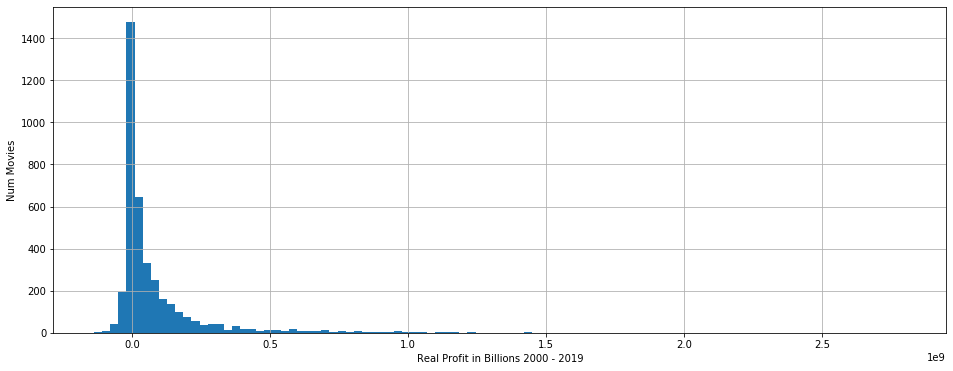

In [30]:
plt.figure(figsize=(16,6))
plt.xlabel('Real Profit in Billions 2000 - 2019')
plt.ylabel('Num Movies')
last_20_years_movie_budgets_df['real_profit'].hist(bins=100);

It's notable that a significant amount of movies lost money

The mean real profit may be approx. 82,000,000, the the median is only approx. 16,000,000

The positive outliers are pulling the mean up

#### Boxplot of real production budget, domestic gross, worldwide gross and profit

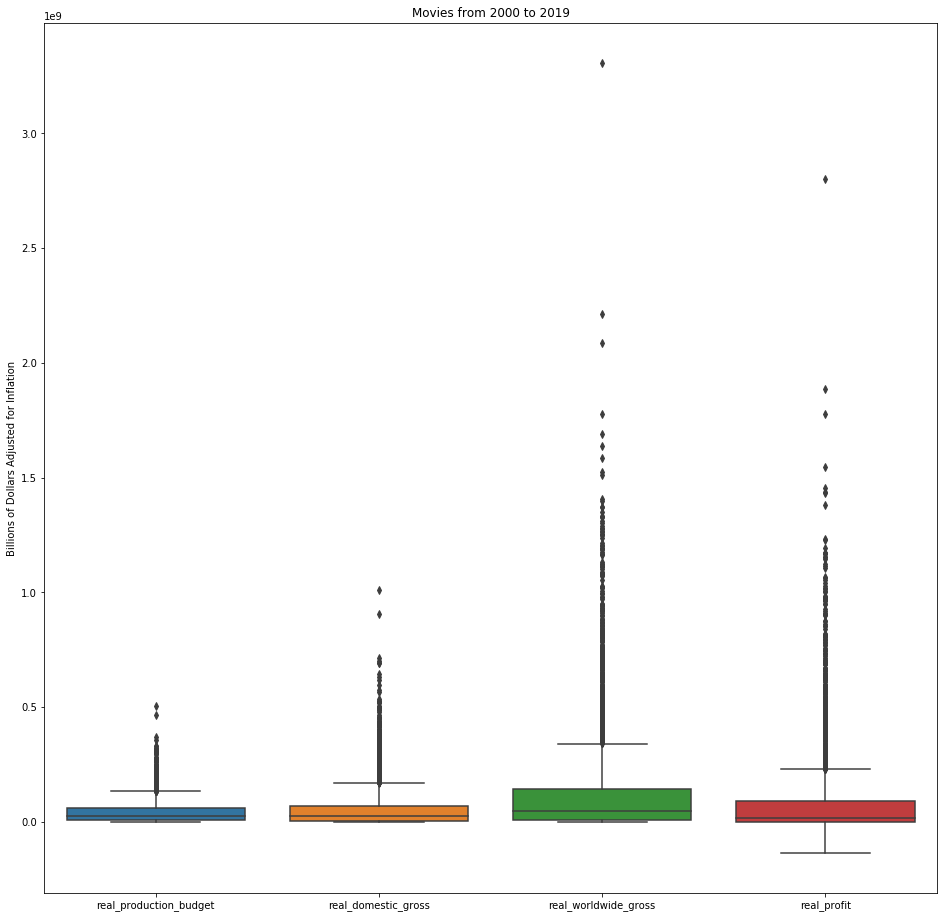

In [31]:
cols_for_boxplot = ['real_production_budget', 'real_domestic_gross', 'real_worldwide_gross', 'real_profit']
plt.figure(figsize=(16,16))
ax = sns.boxplot(data=last_20_years_movie_budgets_df[cols_for_boxplot])
ax.set_title('Movies from 2000 to 2019')
ax.set_ylabel('Billions of Dollars Adjusted for Inflation');

#### Boxplot of Real Profit Margin

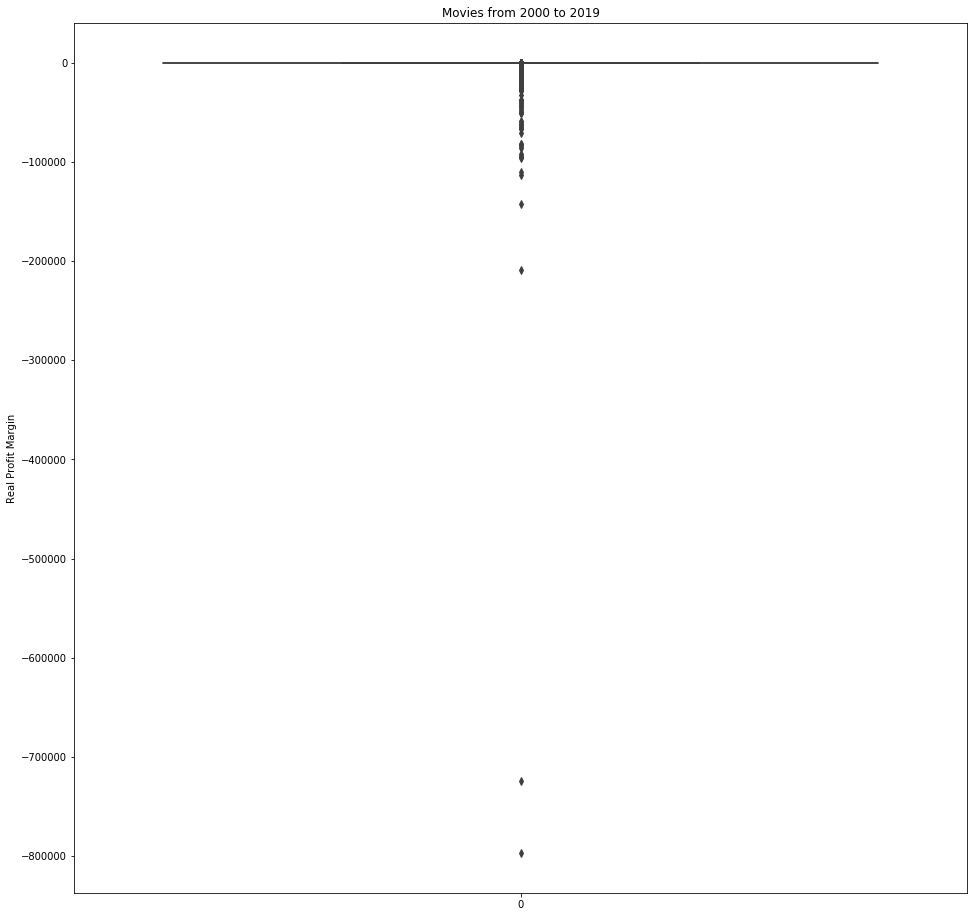

In [32]:
plt.figure(figsize=(16,16))
margin_ax = sns.boxplot(data=last_20_years_movie_budgets_df['real_margin'])
margin_ax.set_title('Movies from 2000 to 2019')
margin_ax.set_ylabel('Real Profit Margin');

#### Histogram of Real Profit Margin

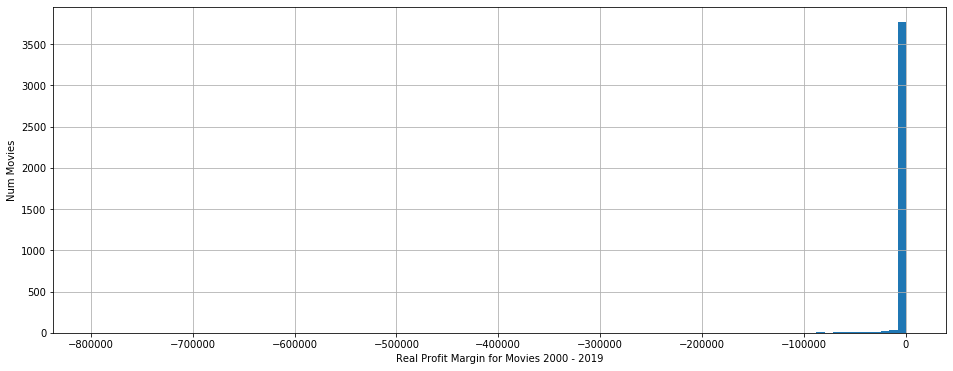

In [33]:
plt.figure(figsize=(16,6))
plt.xlabel('Real Profit Margin for Movies 2000 - 2019')
plt.ylabel('Num Movies')
last_20_years_movie_budgets_df['real_margin'].hist(bins=100);

#### Look at the top profitable movies

In [34]:
last_20_years_movie_budgets_df.sort_values(by=['real_profit'])[real_cols].tail(20)

,id,release_date,movie,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
47,48,2013-05-03,Iron Man 3,2.194886e+08,4.488457e+08,1.333824e+09,1.114335e+09,83.544407
342,43,2001-12-19,The Lord of the Rings: The Fellowship of the Ring,1.573496e+08,4.555123e+08,1.280755e+09,1.123405e+09,87.714309
134,35,2017-03-17,Beauty and the Beast,1.668779e+08,5.256803e+08,1.313329e+09,1.146451e+09,87.293517
112,13,2018-06-22,Jurassic World: Fallen Kingdom,1.730804e+08,4.252887e+08,1.329433e+09,1.156353e+09,86.980890
3,4,2015-05-01,Avengers: Age of Ultron,3.565998e+08,4.951040e+08,1.513353e+09,1.156753e+09,76.436443
41,42,2018-02-16,Black Panther,2.036240e+08,7.127445e+08,1.372688e+09,1.169064e+09,85.166046
424,25,2003-05-30,Finding Nemo,1.306074e+08,5.287228e+08,1.301113e+09,1.170505e+09,89.961870
672,73,2015-07-10,Minions,7.981967e+07,3.624738e+08,1.251590e+09,1.171770e+09,93.622538
692,93,2004-05-19,Shrek 2,9.473790e+07,5.971550e+08,1.268146e+09,1.173408e+09,92.529414
426,27,2002-12-18,The Lord of the Rings: The Two Towers,1.335840e+08,4.867985e+08,1.328307e+09,1.194723e+09,89.943293


#### Look at the movies that had zero profit or lost money

In [35]:
# look at the movies that lost the most money
last_20_years_movie_budgets_df.sort_values(by=['real_profit'])[real_cols].head(20)

,id,release_date,movie,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
352,53,2001-04-27,Town & Country,1.515753e+08,9.689921e+06,1.496231e+07,-1.366130e+08,-913.047179
404,5,2002-08-16,The Adventures of Pluto Nash,1.421106e+08,6.268644e+06,1.008274e+07,-1.320279e+08,-1309.444263
193,94,2011-03-11,Mars Needs Moms,1.704842e+08,2.431418e+07,4.495073e+07,-1.255335e+08,-279.269072
669,70,2001-02-23,Monkeybone,1.082681e+08,7.809039e+06,7.809039e+06,-1.004590e+08,-1286.445407
607,8,2005-09-02,A Sound of Thunder,1.047238e+08,2.487781e+06,8.247590e+06,-9.647622e+07,-1169.750372
434,35,2004-04-09,The Alamo,1.245127e+08,3.032474e+07,3.236160e+07,-9.215107e+07,-284.754327
477,78,2017-04-21,The Promise,9.386884e+07,8.577826e+06,1.100499e+07,-8.286385e+07,-752.966004
300,1,2010-12-17,How Do You Know?,1.406925e+08,3.542240e+07,5.818593e+07,-8.250655e+07,-141.798122
817,18,2000-10-27,Lucky Numbers,9.650235e+07,1.486765e+07,1.486765e+07,-8.163470e+07,-549.076105
478,79,2010-11-24,The Nutcracker in 3D,1.055194e+08,2.291634e+05,2.399512e+07,-8.152424e+07,-339.753394


In [36]:
num_movies_with_no_profit = len(last_20_years_movie_budgets_df[last_20_years_movie_budgets_df['real_profit'] <= 0])
percent_no_profit = round(num_movies_with_no_profit/len(last_20_years_movie_budgets_df)*100)
print(f'There are {num_movies_with_no_profit} movies with no profit.  {percent_no_profit} percent of the total.')

There are 1229 movies with no profit.  32 percent of the total.


#### Look at Correlation Production_Budget and Gross Profit

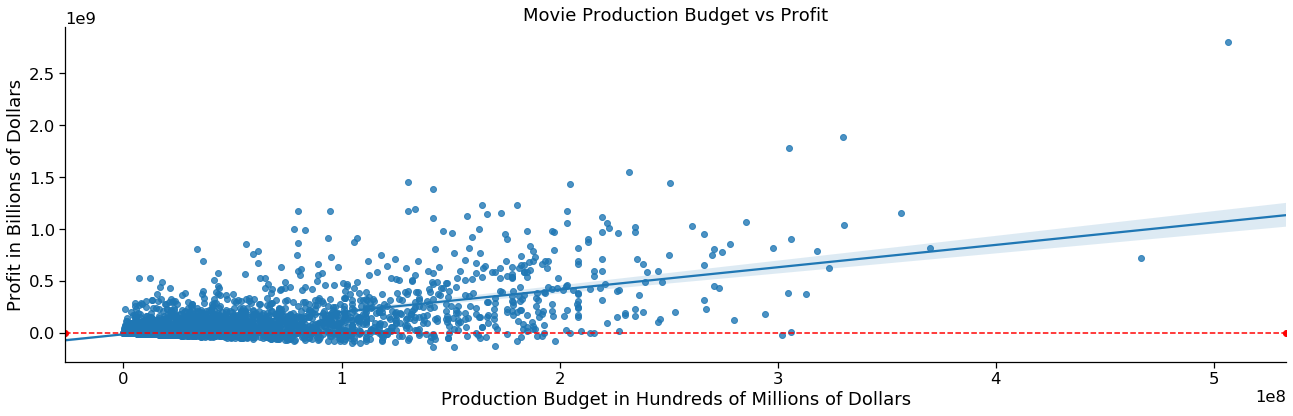

In [88]:
sns.set_context('notebook', font_scale=1.5)
rpb_vs_rp = sns.lmplot(x='real_production_budget', y='real_profit', 
                data=last_20_years_movie_budgets_df, height=6, aspect=3)

# Add a line along y=0 to better illustrate the amount of movies that had a negative profit
rpb_vs_rp.map(plt.axhline, y=0, ls='--', c='red');

fig = rpb_vs_rp.fig
ax = fig.axes[0]
ax.xaxis.set_label_text('Production Budget in Hundreds of Millions of Dollars')
ax.yaxis.set_label_text('Profit in Billions of Dollars')
ax.set_title('Movie Production Budget vs Profit')

plt.show()


In [84]:
production = last_20_years_movie_budgets_df.real_production_budget
profit = last_20_years_movie_budgets_df.real_profit
round(production.corr(profit), 2)

0.63

From the above visualization and from the correlation calculation we can see the moderate positive correlation between the amount of money spent in production and the profit a movie will make.  

However we know that a third of these movies lose or make no profit.  We need to investigate if there are other factors that can be taken into account to increase the likelihood of a profitable movie. 

# What we have so far

* a table maybe from **Box Office Mojo**
  * with a list of movies with incomplete data on domestic and foreign gross, 
* a set of related tables from the **IMDB** that are linked by title keys and name keys
  * a table of people with a name key that work on the industry with their positions and movies they worked on indicated by a title key
  * A list of the multiple names a movie has used internationaly with their title key
  * A table with a primary & original movie name, its release year, runtime and genre with the title key
  * A table with directors and writers of movies using their name keys and the title keys.  Data that probably could have been pulled from the table of people working in the industry.
  * A list of the principle people working on films, the job they had, and for actors the character's name indicated by their name key and linked to a movie by title key
  * A table of crowd sourced ratings including the average rating and the number of votes, linked to movies by the title key
* Two tables from **Rotten Tomatoes** that cannot be linked to specific movies by name, but are linked by a key
  * A table that includes a synopsis, MPAA rating, genre, director, writer, release date with d/m/y, dvd date with d/m/y, box office gross, runtime, and studio
  * A table of reviews linked to a movie by key with the writer, publisher, boolean values of good or bad, top critic or not, and published date
* A table from **The Movie Database (TMDB)** which has a API to potentially gather more data, and get a data dictionary
  * The table contains, genre id, title, popularity, vote average, and vote count
  * https://www.themoviedb.org/documentation/api?language=en-US
* A table potentially from **The Numbers** (mentioned above in the EDA of the BOM Table)
  * the table has movie titles, production budget, domestic gross and worldwide gross
  * with a date range of 1915 to the end of 2020
  

Other information that might be useful
* awards
  * Oscars data is available here http://awardsdatabase.oscars.org/
    * A search will need to be done, then the results page scraped.
* Time in production and in theaters calculate anticipated rates of return 
* Profit adjustments / influencers
  * adjusting for inflation
    * use the CPI
    * https://www.maa.org/press/periodicals/loci/joma/the-consumer-price-index-and-inflation-adjust-numbers-for-inflation
    * https://data.bls.gov/cgi-bin/surveymost?cu
    * https://towardsdatascience.com/the-what-and-why-of-inflation-adjustment-5eedb496e080
  * influence of major economic indicators
    * unemployment
    * available credit
* How do we define "doing the best" at the box office
  * https://www.newyorker.com/culture/richard-brody/what-it-takes-to-make-a-great-movie
  * Profit
  * Reviews and Awards
  * Influence on society (presumably positive)
* What has already been published
  * https://minimaxir.com/2018/07/imdb-data-analysis/
    * looks at the IMDB data and gives some definitions of the data
  * https://www.kaggle.com/PromptCloudHQ/imdb-data
    * a licensed version of the IMDB data
    * has 43 Kernels

Assumptions about the audience:
* Microsoft is a for profit corporation and will be interested in profits above all else
* Microsoft current entertainment division is Gaming with Xbox
* entering the movie industry, could maybe support the gaming division, and not the other way around given that gaming is said to be a larger industry than the movie industry now
* Microsoft did have a movie studio, XBOX Entertainment Studios, from 2012-2014 (should that be included or ignored)
  * https://en.wikipedia.org/wiki/Xbox_Entertainment_Studios
* their 2019 annual report https://www.microsoft.com/investor/reports/ar19/index.html